In [11]:
# just in-case installs
!pip install -U matplotlib
!pip install -U bioinfokit
!pip install -U yellowbrick
!pip install -U statsmodels

In [12]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [13]:
# peeking at the dataset
df = pd.read_csv("/content/mcdonalds.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [14]:
# finding the shape
df.shape

(1453, 15)

In [15]:
# checking for datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


**NOTE**: There are three columns in Dataset having different features as compared to other columns. Columns "Like" and "Age" are having numerical features and "VisitFrequency" is having multiclass features.

In [16]:
# getting the value counts of 'Like'
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [17]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [18]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [19]:
# getting the value counts of 'Age'
df['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [20]:
# getting the value counts of 'VisitFrequency'
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [21]:
# getting the value counts of 'Gender'
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

     Age
Age  1.0


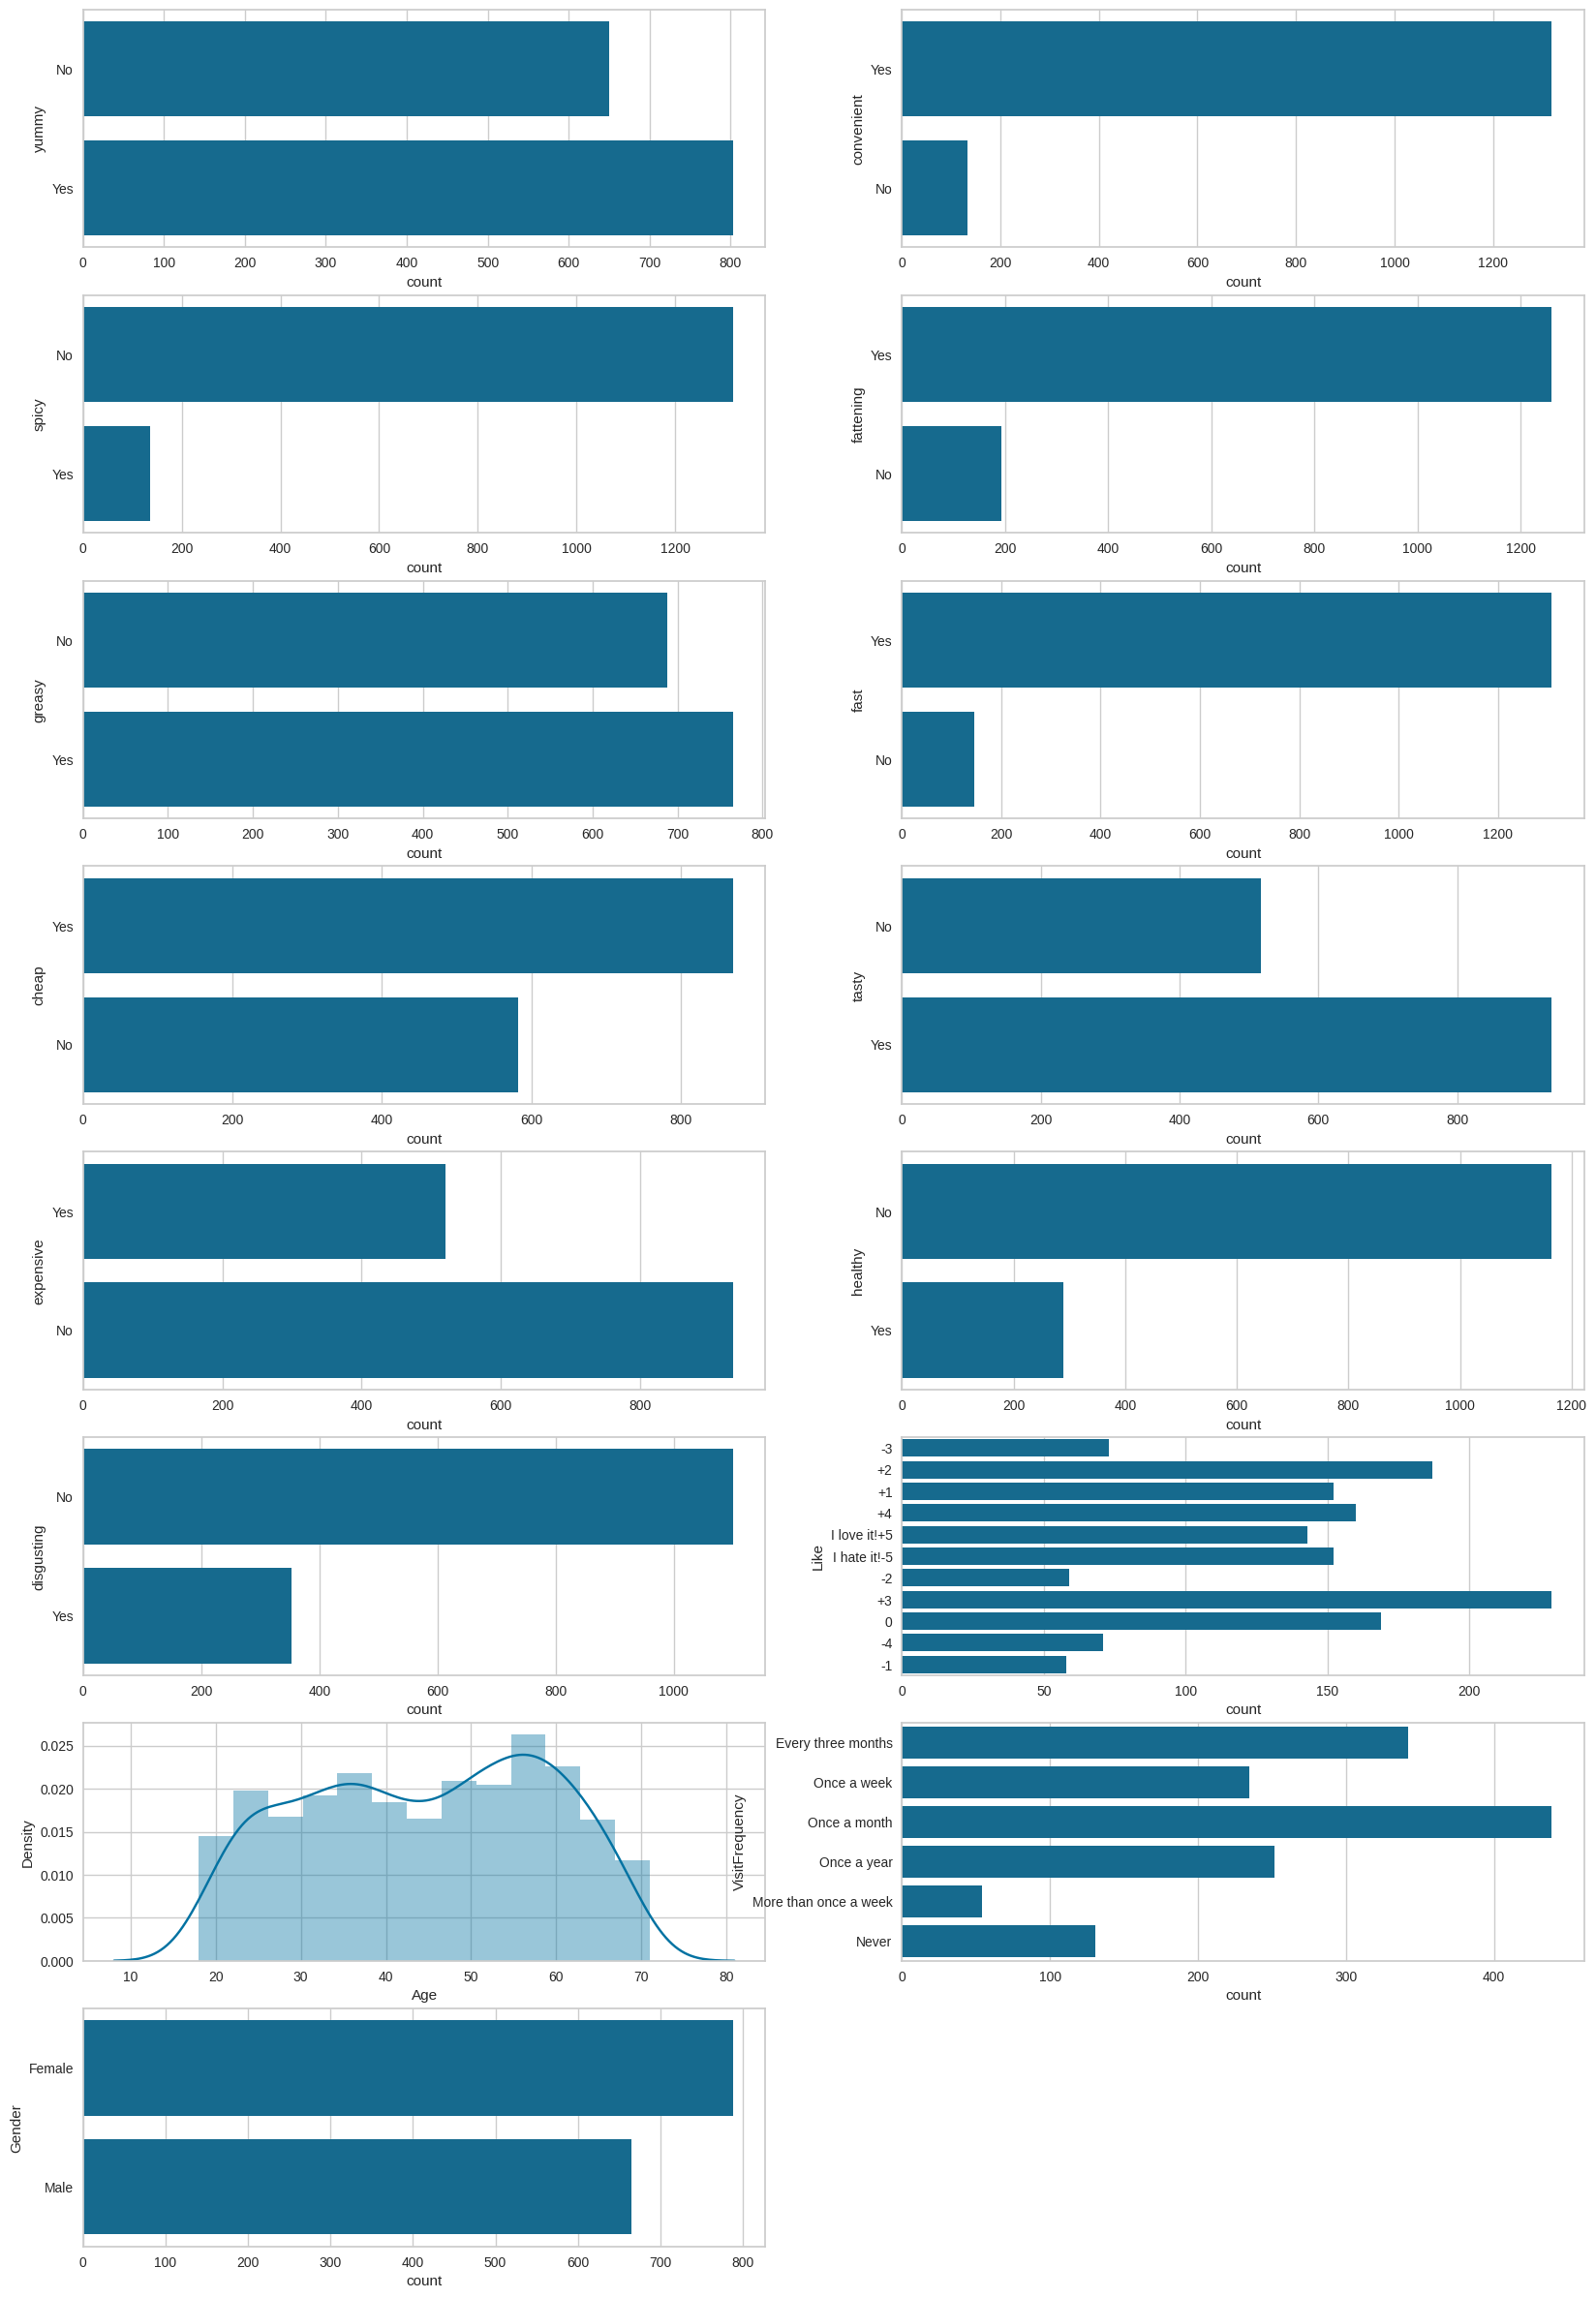

In [22]:
# defining a function to perform EDA
def EDA(df,figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1]+1)/2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.countplot(df[i])
        else:
            con.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.distplot(df[i])

    print(df.corr())

# applying the function on the dataset
EDA(df, (20, 30))

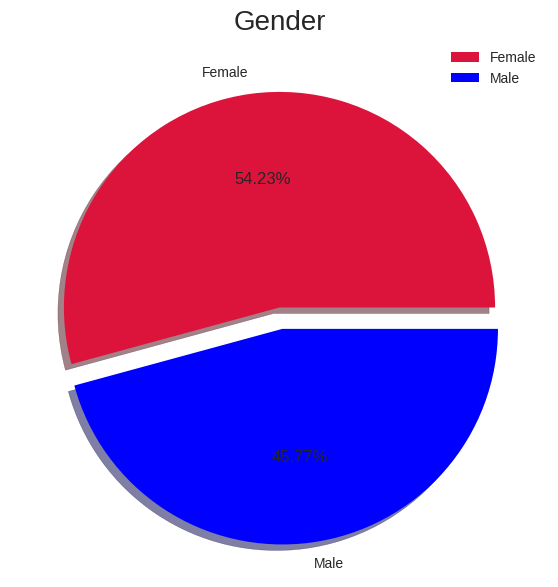

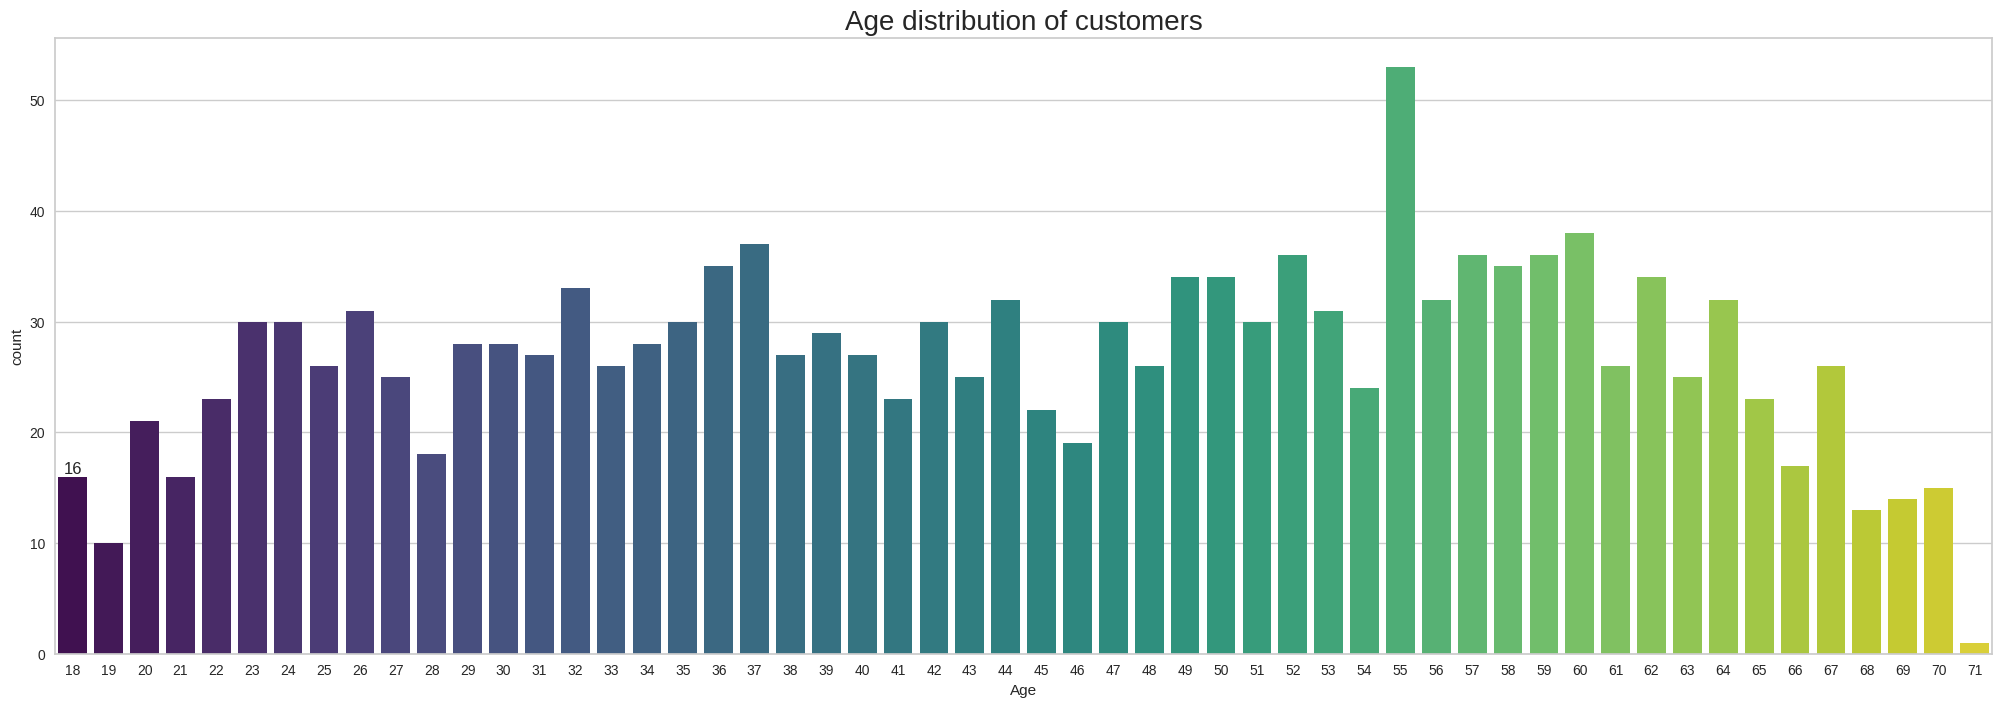

In [24]:
# Demographic segmentation using 'Age' & 'Gender'

# Gender: we infer that there are more female customers than male
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['crimson', 'blue']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Age: Mcdonalds recieve more customers of age between 50-60 and 35-40
plt.rcParams['figure.figsize'] = (25, 8)
data = sns.countplot(x=df['Age'], palette = 'viridis')
data.bar_label(data.containers[0])
plt.title('Age distribution of customers', fontsize = 20)
plt.show()

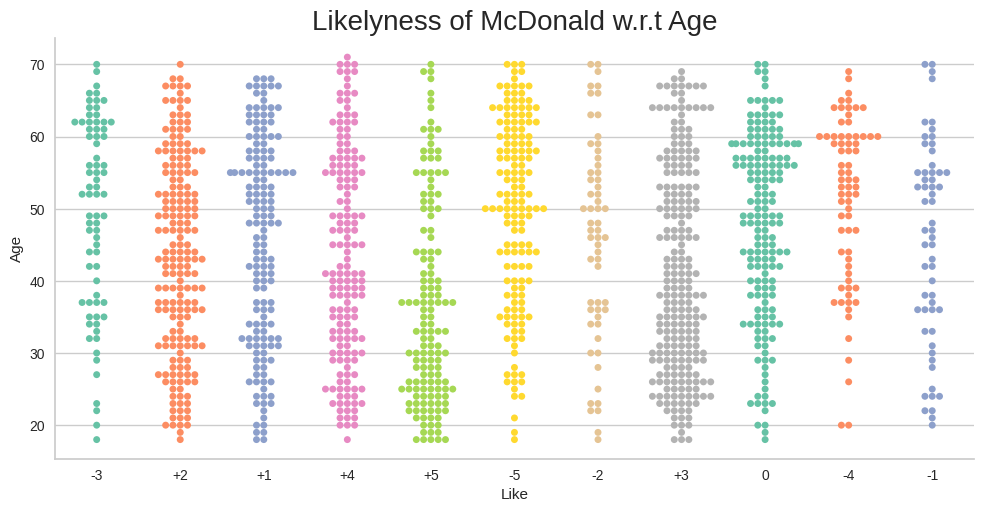

In [25]:
# Pyschographic segmentation using 'Like'

# renaming the category for convinence
df['Like'] = df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

# plotting the results
sns.catplot(data=df, x="Like", y="Age", orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age', fontsize=20)
plt.show()

# Data Preprocessing

In [26]:
# columns other than Like, Age, VisitFrequency, Gender are having binary features in the form of Yes/No only.
# so we will perform 'label encoding' for further model building
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1)

In [27]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [ ]:
# LabelEncoder will map 'Yes' to 1 and 'No' to 0
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df_encoded.head()

# Applying PCA

In [ ]:
# applying scaling and PCA
pca_data = preprocessing.scale(df_encoded)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

In [ ]:
# variance (from PC1 to PC11)
pca.explained_variance_ratio_

In [ ]:
# correlation coefficient between original variables and the component
loadings_df = pd.DataFrame(loadings.T, columns=["PC"+str(i) for i in range(1, num_pc+1)], index=df_encoded.columns)
loadings_df

In [ ]:
# correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='bwr')
plt.show()

In [ ]:
# get PC scores
plt.rcParams['font.family'] = 'serif'
pca_scores = PCA().fit_transform(pca_data)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

# Applying the Elbow Method

In [ ]:
# using k-means clustering analysis for extracting segments
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_encoded)
visualizer.show();

# Applying the K-Means Clustering Algorithm

In [ ]:
# k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS)
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))

In [ ]:
# cluster visualization
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.title("Cluster Visualization with K-Means")
plt.legend()
plt.show()

## Describing Segments

In [ ]:
# crosstab creation
crosstab = pd.crosstab(df['cluster_num'], df['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(crosstab.stack())
display(crosstab, plt.show())

In [ ]:
# crosstab creation
crosstab_gender = pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
display(crosstab, plt.show())

In [ ]:
# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=df);

# Selecting the Target Segment

In [ ]:
# calculating the mean of 'VisitFrequency'
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

In [ ]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

In [ ]:
# calculating the mean of 'Gender'
Gender = df.pivot_table(index='cluster_num', values='Gender', aggfunc='mean').reset_index()
Gender

In [ ]:
segment = pd.concat([Gender.set_index('cluster_num'), Like.set_index('cluster_num'), visit.set_index('cluster_num')], axis=1).reset_index()
segment

In [ ]:
# targeting segments
plt.figure(figsize=(9, 4))
segment.plot(kind='scatter', x='VisitFrequency', y='Like', s=1000, color='m')
plt.title("Simple segment evaluation plot for the fast food data set", fontweight='bold', fontsize=24, color='b')
plt.xlabel("Visit", fontsize=20, fontweight='bold')
plt.ylabel("Like", fontsize=20, fontweight='bold')
plt.show()